In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [3]:
#Problem 1
iris = load_iris()

X = iris.data
Y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


regressor = LinearRegression()
regressor.fit(X_train, y_train)

filename = 'linear_regression_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

load_model = pickle.load(open(filename, 'rb'))

y_pred = load_model.predict(X_test)

print('root mean squared error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

root mean squared error :  0.19264940801356453


In [6]:
#Problem 2
df = pd.read_csv("churn_data.csv")
X = df[['gender', 'StreamingTV', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'Dependents','Contract','PaymentMethod','PaperlessBilling']]
Y = df[['Churn']]


In [8]:
X.info()
X.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   StreamingTV       7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   MonthlyCharges    7043 non-null   float64
 5   Dependents        7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaymentMethod     7043 non-null   object 
 8   PaperlessBilling  7043 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 495.3+ KB


gender              False
StreamingTV         False
SeniorCitizen       False
tenure              False
MonthlyCharges      False
Dependents          False
Contract            False
PaymentMethod       False
PaperlessBilling    False
dtype: bool

In [9]:
for column in X.columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

<ipython-input-9-3c405896583f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-9-3c405896583f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-9-3c405896583f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

<Axes: >

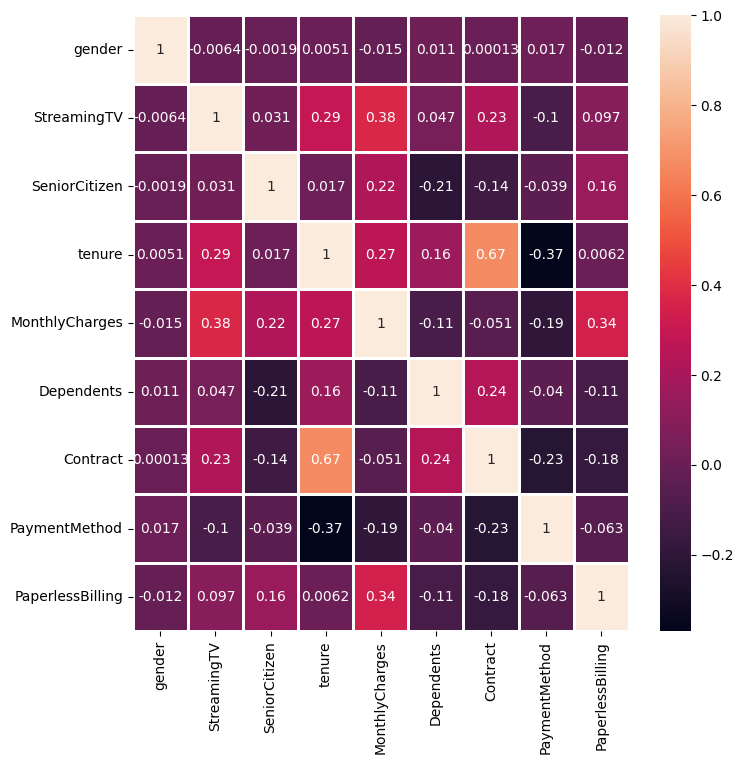

In [10]:
plt.figure(figsize=(8, 8))
#correlation plot for the features
sns.heatmap(X.corr(), linewidths=2, annot=True)

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier()
svc = SVC()
lc = LogisticRegression(max_iter=100)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy score of ",clf.__class__.__name__,"=",
          100*metrics.accuracy_score(y_test, y_pred))

<ipython-input-14-9bec73235051>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Accuracy score of  RandomForestClassifier = 77.07594038325053


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy score of  KNeighborsClassifier = 74.59190915542938


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of  SVC = 74.30801987224982


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score of  LogisticRegression = 77.50177430801988


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
#Problem 3
#Implementing Decision tree as its similar to the J48 algorithm. https://medium.com/@nilimakhanna1/j48-classification-c4-5-algorithm-in-a-nutshell-24c50d20658e

J48 = DecisionTreeClassifier()

J48.fit(X_train, y_train)
y_pred = J48.predict(X_test)
print("Accuracy score of J48/decision-tree",
      100*metrics.accuracy_score(y_test, y_pred))

Accuracy score of J48/decision-tree 72.03690560681333


In [18]:
#Problem 4
iris = load_iris()

X = iris.data
Y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

from statsmodels.api import OLS
OLS(y_train,X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              879.7
Date:                Sat, 15 Jun 2024   Prob (F-statistic):                    2.08e-81
Time:                        03:52:06   Log-Likelihood:                          7.9704
No. Observations:                 112   AIC:                                     -7.941
Df Residuals:                     108   BIC:                                      2.933
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0842      0.060     -1.411      0.161      -0.203       0.034
x2            -0.0346      0.069     -0.505      0.615      -0.171       0.101
x3             0.2607      0.070      3.712      0.000       0.121       0.400
x4             0.5181      0.116      4.463      0.000       0.288       0.748
==============================================================================
Omnibus:                        0.400   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.819   Jarque-Bera (JB):                0.273
Skew:                          -0.121   Prob(JB):                        0.873
Kurtosis:                       3.002   Cond. No.                         52.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""